In [ ]:
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [157]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [158]:
data = pd.read_csv("dataset/train.csv")

In [159]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Preprocessing

In [160]:
data.shape

(8693, 14)

In [161]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [162]:
# Fill in missing values
def handle_nan(data, stats = True):
    
    # if true, use statistical inference obtained from the data to fill up nan.
    if stats:
        obj_cols = ["PassengerId","Cabin"]
        num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']
        bool_cols = ["CryoSleep","Transported","VIP"]
        cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

        for col in data.columns:
            if col in cat_cols:
                data[col] = data[col].fillna(data[col].mode()[0])
                
            elif col in obj_cols:
                data[col] = data[col].fillna(data[col].mode()[0])
                
            elif col in num_cols:
                data[col] = data[col].fillna(0)
                
            else:
                data[col] = data[col].fillna(data[col].mode()[0])
                
                
     # if false, drop nan rows
    else:
        data = data.dropna()
            
    return data

In [163]:
data = handle_nan(data, stats = True)

In [164]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [168]:
data.duplicated(keep='first').sum()

0

## Data Analysis and Feature Transformation

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
len(data["Cabin"].unique())

6560

In [11]:
### Breakdown the cabin
hold = data["Cabin"].unique()[0]

In [12]:
def handle_Cabin(data):
    deck_list = []
    num_list = []
    side_list = []
    
    
    cabin = data["Cabin"].to_list()
    for info in cabin:
        info = info.split('/')
        deck ,num, side = info[0], info[1], info[2]
        
        deck_list.append(deck)
        num_list.append(int(num))
        side_list.append(side)
        
    data["deck"],data["room_num"],data["room_side"] = deck_list, num_list, side_list
    
    return data

        

In [13]:
data =  handle_Cabin(data)

In [14]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_num,room_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  deck          8693 non-null   object 
 15  room_num      8693 non-null   int64  
 16  room_side     8693 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(7)
memory usage: 976.4+ KB


In [16]:
def correct_datatype(data):
    obj_cols = ["PassengerId","Cabin"]
    num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','room_num']
    bool_cols = ["CryoSleep","Transported","VIP"]
    cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

    for col in data.columns:
        if col in bool_cols:
            data[col] = data[col].astype('bool')
        elif col in cat_cols:
            data[col] = data[col].astype('category')
        elif col in num_cols:
            data[col] = data[col].astype('float')

    return data

In [17]:
# correct datatype
data = correct_datatype(data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   category
 2   CryoSleep     8693 non-null   bool    
 3   Cabin         8693 non-null   object  
 4   Destination   8693 non-null   category
 5   Age           8693 non-null   float64 
 6   VIP           8693 non-null   bool    
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8693 non-null   category
 13  Transported   8693 non-null   bool    
 14  deck          8693 non-null   category
 15  room_num      8693 non-null   float64 
 16  room_side     8693 non-null   category
dtypes: bool(3), category(5), float64(7), object(2)
memor

In [19]:
# review destination column
data["Destination"].unique()

[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]
Categories (3, object): [TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

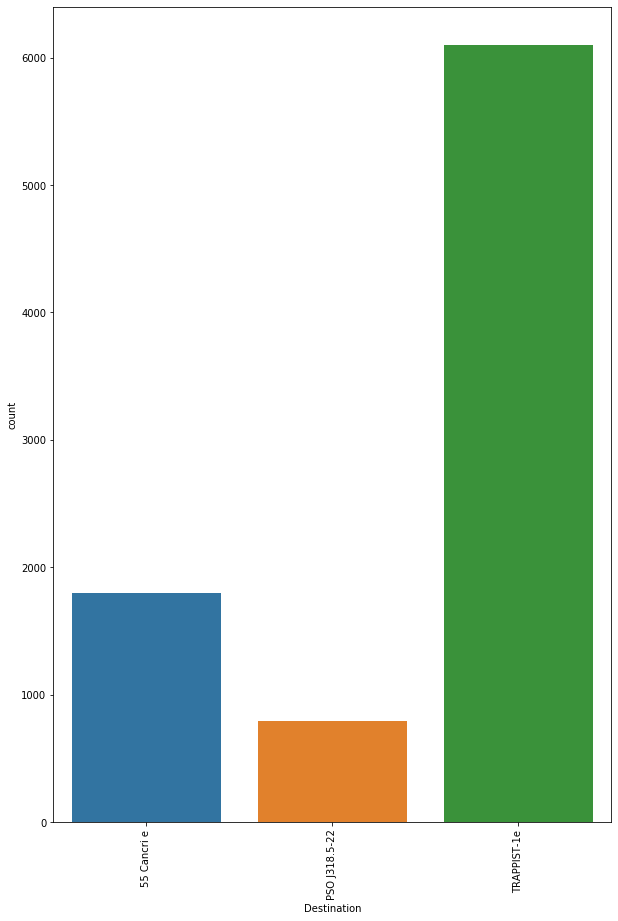

In [20]:
f, ax = plt.subplots(figsize=(10, 15))

g = sns.countplot(x="Destination", data=data)
plt.xticks(rotation=90)

In [21]:
# review homeplant column
data["HomePlanet"].unique()

[Europa, Earth, Mars]
Categories (3, object): [Europa, Earth, Mars]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

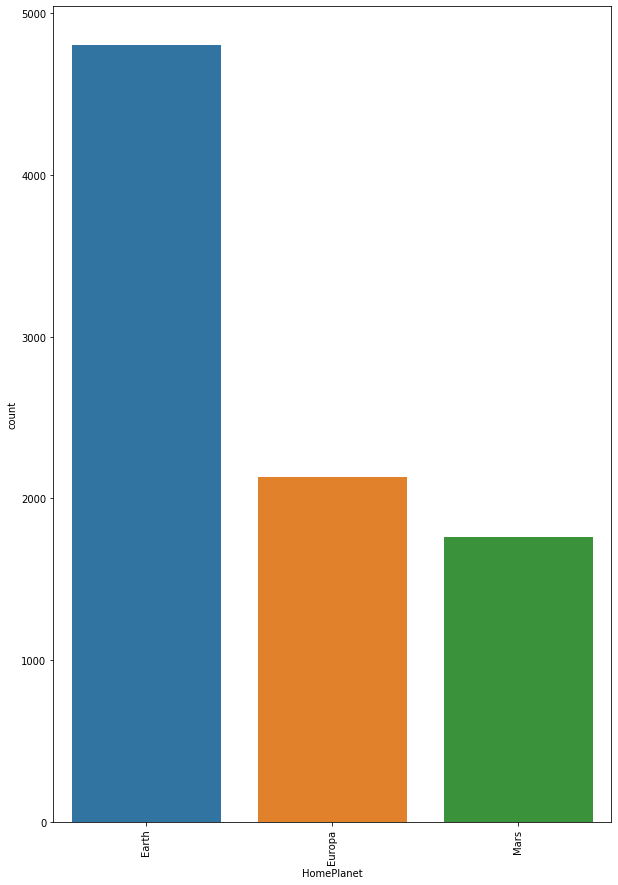

In [22]:
f, ax = plt.subplots(figsize=(10, 15))

g = sns.countplot(x="HomePlanet", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

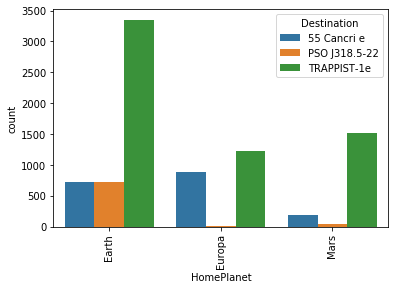

In [23]:
sns.countplot(data["HomePlanet"],hue=data["Destination"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

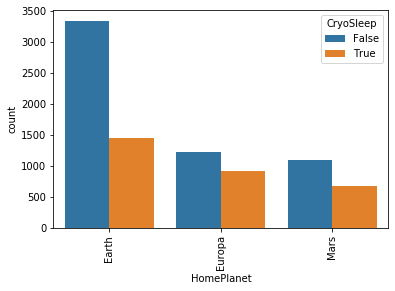

In [24]:
# checking the countplot relation of homeplanet and cyrosleep
sns.countplot(data["HomePlanet"],hue=data["CryoSleep"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

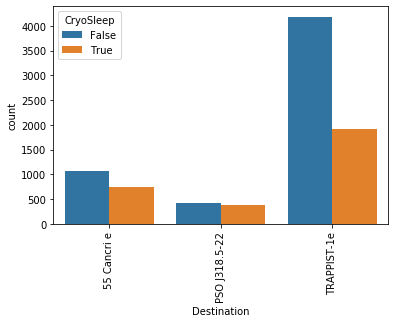

In [25]:
# checking the countplot relation of destination  and CryoSleep

sns.countplot(data["Destination"],hue=data["CryoSleep"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

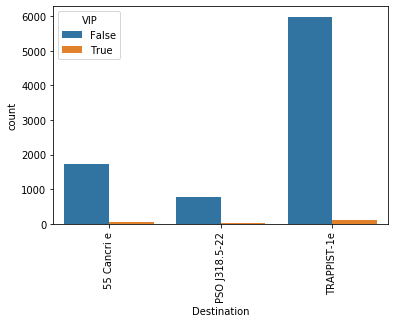

In [26]:
# checking the countplot relation of destination  and vip
sns.countplot(data["Destination"],hue=data["VIP"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

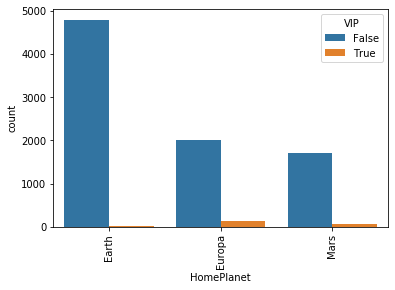

In [27]:
# checking the countplot relation of destination  and vip
sns.countplot(data["HomePlanet"],hue=data["VIP"])
plt.xticks(rotation=90)

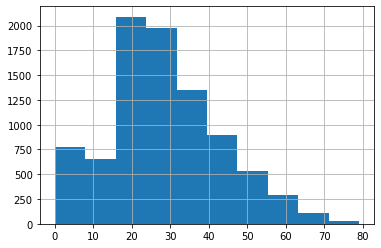

In [28]:
### Age distrubition
data["Age"].hist()

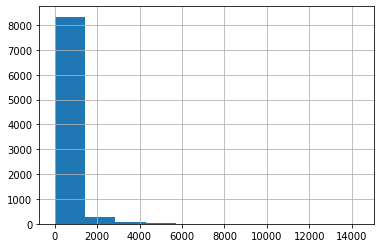

In [29]:
### Room Service distrubition
data["RoomService"].hist()

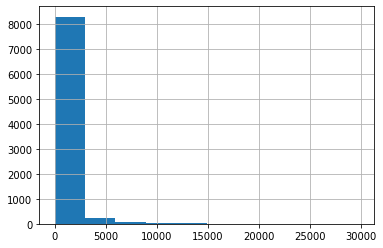

In [30]:
### FoodCourt distrubition
data["FoodCourt"].hist()

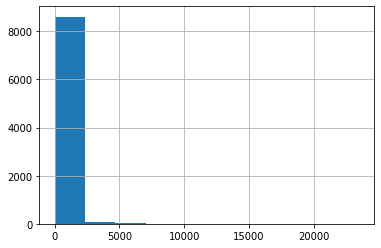

In [31]:
### ShoppingMall distrubition
data["ShoppingMall"].hist()

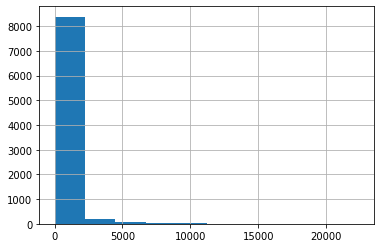

In [32]:
### Spa distrubition
data["Spa"].hist()

### Box plots diagram showing the distribution of luxury spenders based on homeplanet on the spaceship

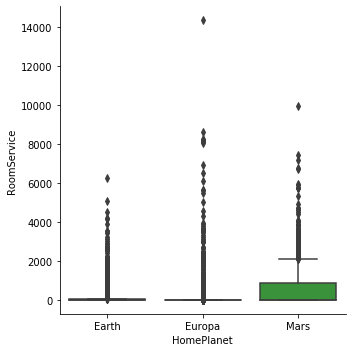

In [33]:
sns.catplot(x="HomePlanet", y="RoomService", kind="box", data=data)

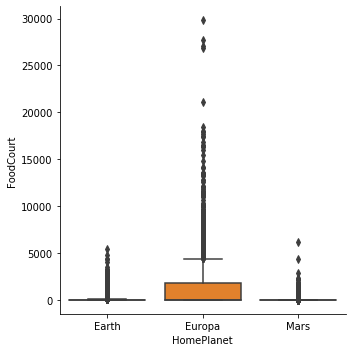

In [34]:
#sns.catplot(x='HomePlanet',y ='',data =data)
sns.catplot(x="HomePlanet", y="FoodCourt", kind="box", data=data)

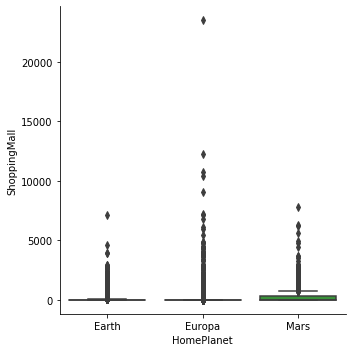

In [35]:
sns.catplot(x="HomePlanet", y="ShoppingMall", kind="box", data=data)

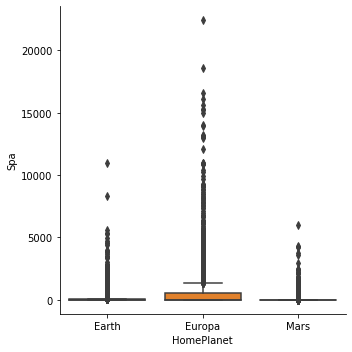

In [36]:
sns.catplot(x="HomePlanet", y="Spa", kind="box", data=data)

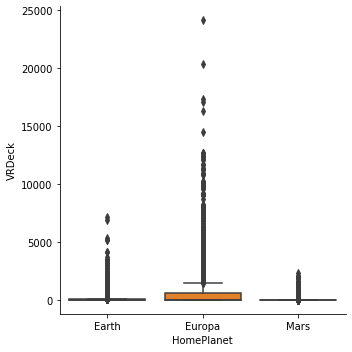

In [37]:
sns.catplot(x="HomePlanet", y="VRDeck", kind="box", data=data)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

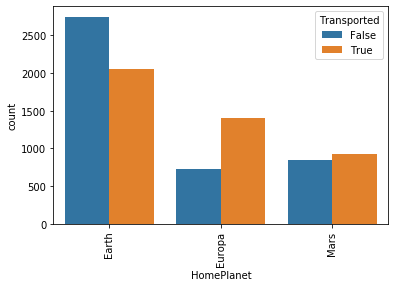

In [38]:
# how many members were successfully transported based on home planet
sns.countplot(data["HomePlanet"],hue=data["Transported"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

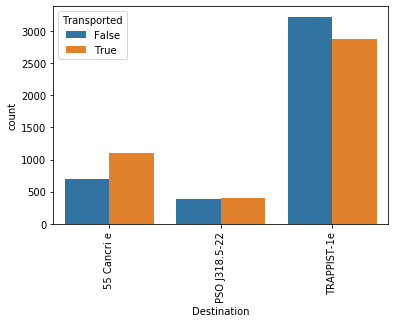

In [39]:
# how many members were successfully transported based on Destination
sns.countplot(data["Destination"],hue=data["Transported"])
plt.xticks(rotation=90)

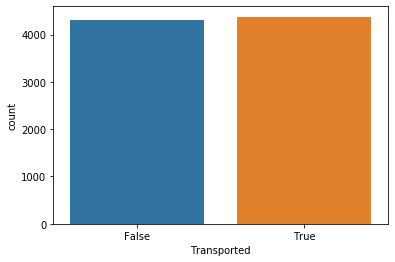

In [40]:
# check if target is balanced
sns.countplot(data["Transported"])

### Correlation between data points

In [41]:
obj_cols = ["PassengerId","Cabin"]
num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','room_num']
bool_cols = ["CryoSleep","Transported","VIP"]
cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

In [42]:
cat_cols

['HomePlanet', 'Destination', 'Name', 'deck', 'room_side']

Text(0.5, 159.0, ' --- ')

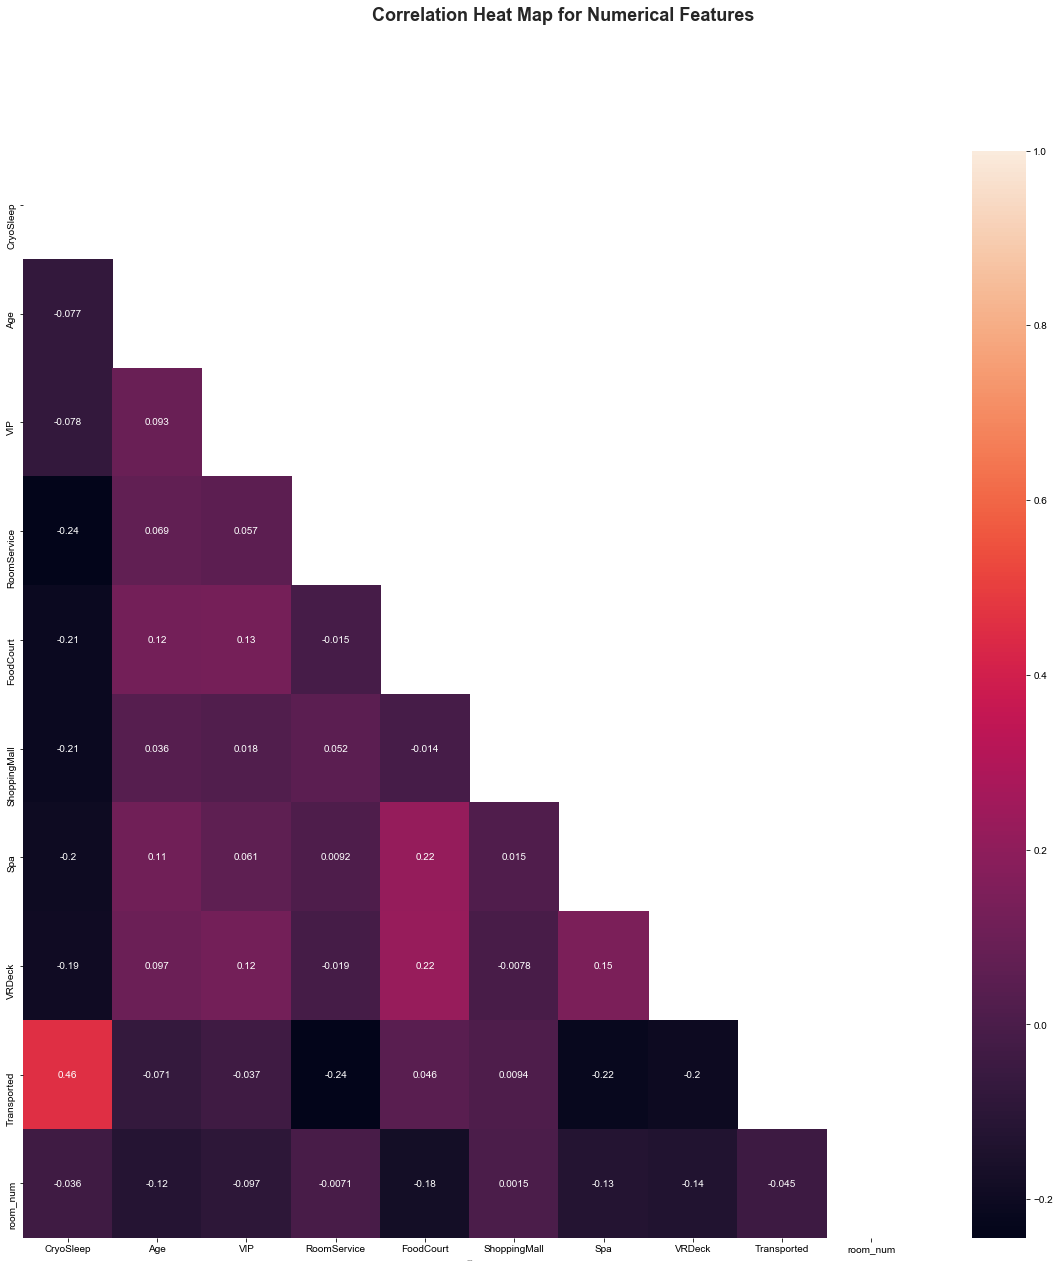

In [43]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = data.drop(cat_cols,axis=1)


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for Numerical Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

In [44]:
data[cat_cols].head()

,HomePlanet,Destination,Name,deck,room_side
0,Europa,TRAPPIST-1e,Maham Ofracculy,B,P
1,Earth,TRAPPIST-1e,Juanna Vines,F,S
2,Europa,TRAPPIST-1e,Altark Susent,A,S
3,Europa,TRAPPIST-1e,Solam Susent,A,S
4,Earth,TRAPPIST-1e,Willy Santantines,F,S


In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
enc = OrdinalEncoder()

In [47]:
cat_data = data[cat_cols].drop(["Name"],axis=1)

In [48]:
cat_data.head()

,HomePlanet,Destination,deck,room_side
0,Europa,TRAPPIST-1e,B,P
1,Earth,TRAPPIST-1e,F,S
2,Europa,TRAPPIST-1e,A,S
3,Europa,TRAPPIST-1e,A,S
4,Earth,TRAPPIST-1e,F,S


In [49]:
cat_data = enc.fit_transform(cat_data)

In [50]:
cat_data = pd.DataFrame(cat_data, columns=[i for i in cat_cols if i != "Name"])

In [51]:
cat_data.head()

,HomePlanet,Destination,deck,room_side
0,1.0,2.0,1.0,0.0
1,0.0,2.0,5.0,1.0
2,1.0,2.0,0.0,1.0
3,1.0,2.0,0.0,1.0
4,0.0,2.0,5.0,1.0


Text(0.5, 156.5, ' --- ')

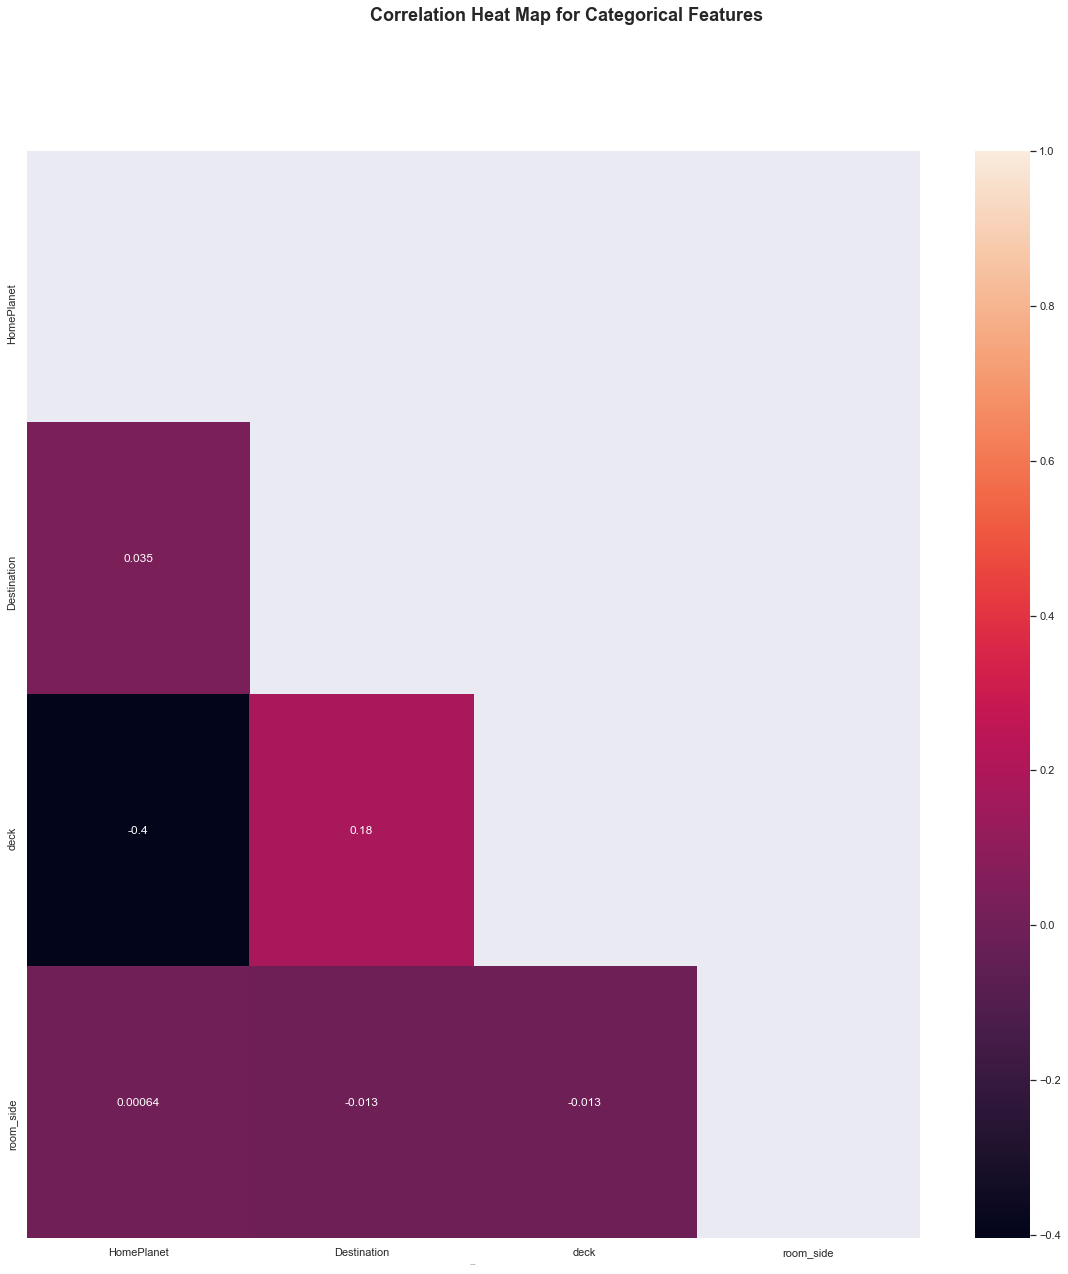

In [52]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = cat_data


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for Categorical Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

### confirm correlation accross entire dataset

In [53]:
data["HomePlanet_enc"] = cat_data["HomePlanet"].to_list()
data["Destination_enc"] = cat_data["Destination"].to_list()
data["deck_enc"] = cat_data["deck"].to_list()
data["room_side_enc"] = cat_data["room_side"].to_list()

In [54]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,deck,room_num,room_side,HomePlanet_enc,Destination_enc,deck_enc,room_side_enc
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0.0,P,1.0,2.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0.0,S,0.0,2.0,5.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0.0,S,1.0,2.0,0.0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0.0,S,1.0,2.0,0.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1.0,S,0.0,2.0,5.0,1.0


Text(0.5, 156.453125, ' --- ')

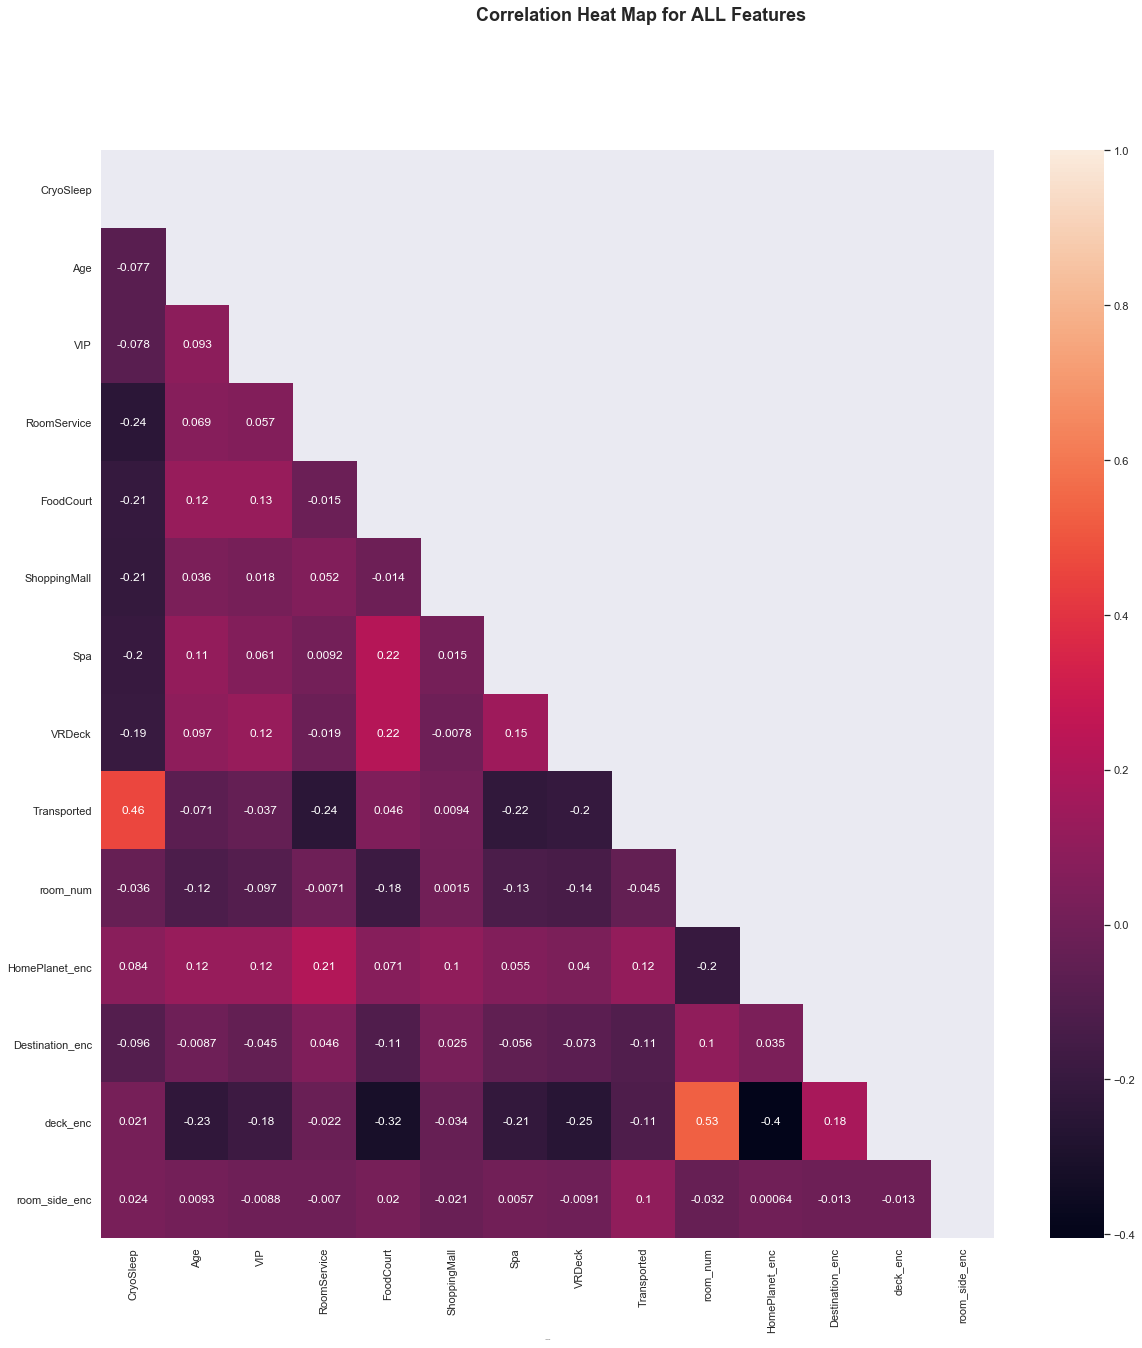

In [156]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = data.drop(cat_cols,axis=1)


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for ALL Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

### No correlation among the columns

## Model Training & Evaluation

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [57]:
dataset =  pd.read_csv("dataset/train.csv")

In [58]:
dataset = handle_nan(dataset, stats = True)

In [59]:
dataset =  handle_Cabin(dataset)

In [60]:
dataset = correct_datatype(dataset)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   category
 2   CryoSleep     8693 non-null   bool    
 3   Cabin         8693 non-null   object  
 4   Destination   8693 non-null   category
 5   Age           8693 non-null   float64 
 6   VIP           8693 non-null   bool    
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8693 non-null   category
 13  Transported   8693 non-null   bool    
 14  deck          8693 non-null   category
 15  room_num      8693 non-null   float64 
 16  room_side     8693 non-null   category
dtypes: bool(3), category(5), float64(7), object(2)
memor

In [62]:
dataset.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
deck            0
room_num        0
room_side       0
dtype: int64

In [63]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_num,room_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [64]:
#dataset["VIP"] = dataset["VIP"].astype(int) 

In [65]:
x = dataset.drop(["PassengerId","Cabin","Name","Transported"], axis=1)
y = dataset["Transported"].astype(int) 

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3,stratify=y)

In [67]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
7011,Earth,True,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,G,1210.0,S
6772,Earth,True,PSO J318.5-22,49.0,False,0.0,0.0,0.0,0.0,0.0,G,1167.0,S
2408,Europa,True,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,C,91.0,P
6992,Earth,False,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,G,1202.0,P
1389,Europa,False,TRAPPIST-1e,26.0,False,0.0,533.0,2119.0,10.0,504.0,B,62.0,S


In [68]:
# obtain statistical information on the Age column
x_train["Age"].describe()

count    6954.000000
mean       28.194852
std        14.936632
min         0.000000
25%        19.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [69]:
# obtain statistical information on the RoomService column
x_train["RoomService"].describe()

count     6954.000000
mean       216.960598
std        648.197030
min          0.000000
25%          0.000000
50%          0.000000
75%         39.000000
max      14327.000000
Name: RoomService, dtype: float64

In [70]:
# obtain statistical information on the FoodCourt column
x_train["FoodCourt"].describe()

count     6954.000000
mean       449.605263
std       1570.582845
min          0.000000
25%          0.000000
50%          0.000000
75%         62.750000
max      29813.000000
Name: FoodCourt, dtype: float64

In [71]:
# obtain statistical information on the ShoppingMall column
x_train["ShoppingMall"].describe()

count     6954.000000
mean       172.525022
std        609.885373
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [72]:
# obtain statistical information on the Spa column
x_train["Spa"].describe()

count     6954.000000
mean       303.960311
std       1130.769358
min          0.000000
25%          0.000000
50%          0.000000
75%         55.000000
max      22408.000000
Name: Spa, dtype: float64

In [73]:
# obtain statistical information on the VRDeck column
x_train["VRDeck"].describe()

count     6954.000000
mean       300.776244
std       1146.769793
min          0.000000
25%          0.000000
50%          0.000000
75%         38.750000
max      24133.000000
Name: VRDeck, dtype: float64

In [74]:
# obtain statistical information on the room_num column
x_train["room_num"].describe()

count    6954.000000
mean      600.517112
std       505.163330
min         0.000000
25%       169.000000
50%       445.000000
75%       981.000000
max      1894.000000
Name: room_num, dtype: float64

In [75]:
to_scale = ["Age","room_num","VRDeck","Spa","ShoppingMall","FoodCourt","RoomService"]
to_enc = ['HomePlanet', 'Destination', 'deck', 'room_side']
to_int = ["VIP","CryoSleep"]

In [76]:
class BoolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        x = None
        if isinstance(X, pd.DataFrame):
            x = pd.DataFrame(columns=self.columns)
            for i in self.columns:
                x[i] = X[i].astype(int) 
            
        return x[self.columns]

In [77]:
bool_pipe = Pipeline([('bool', BoolTransformer(to_int))])


In [78]:
col_transformer_1 = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('scaler', StandardScaler(), to_scale)
        
    ]
)
col_transformer_2 = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('encoder', OrdinalEncoder(), to_enc)
        
    ]
)

In [79]:
col_transformer = FeatureUnion([('ct1', col_transformer_1), ('ct2', col_transformer_2),('bool_pipe', bool_pipe)])

In [80]:
transformed_cols = to_scale + to_enc + to_int

In [81]:
assert len(transformed_cols) == len(x_train.columns), f"This is missing {[i for i in x_train.columns if i not in transformed_cols]}"

In [82]:
pipe = Pipeline([("transfrom",col_transformer)])

In [83]:
x_train[transformed_cols] = pipe.fit_transform(x_train[transformed_cols])

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kenechi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
7011,0.0,1.0,2.0,-0.481726,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,6.0,1.206593,1.0
6772,0.0,1.0,1.0,1.392994,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,6.0,1.121466,1.0
2408,1.0,1.0,2.0,0.053908,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,2.0,-1.008691,0.0
6992,0.0,0.0,2.0,-0.013046,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,6.0,1.190756,0.0
1389,1.0,0.0,2.0,-0.146955,0.0,-0.334738,0.053102,3.191772,-0.259984,0.177227,1.0,-1.066102,1.0


In [86]:
x_test[transformed_cols] = pipe.transform(x_test[transformed_cols])

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kenechi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
375,1.0,0.0,2.0,2.129492,0.0,-0.334738,4.333349,9.477011,1.090522,-0.262300,2.0,-1.167067,0.0
7678,0.0,0.0,2.0,-0.615635,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,6.0,1.442178,0.0
1472,0.0,0.0,2.0,0.656497,0.0,-0.334738,-0.285650,-0.209112,-0.268828,0.467629,6.0,-0.709756,1.0
4498,1.0,1.0,0.0,-0.080000,0.0,-0.334738,-0.286287,-0.282901,-0.268828,-0.262300,2.0,-0.814680,1.0
281,0.0,0.0,1.0,2.129492,0.0,-0.323938,0.057559,-0.281262,-0.268828,-0.258812,5.0,-1.054224,0.0


### Base model

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [89]:
GaussianNB?

In [90]:
basemodel= GaussianNB()
basemodel.fit(x_train, y_train)

GaussianNB()

In [91]:
y_pred = basemodel.predict(x_test)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       863
           1       0.65      0.91      0.76       876

    accuracy                           0.71      1739
   macro avg       0.75      0.71      0.69      1739
weighted avg       0.75      0.71      0.69      1739



#### Base Model Accuracy: 71%

### Accuracy Improvements

In [93]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Model 1 - Support Vector Classifier

In [94]:
model_1 = SVC(kernel = 'rbf', random_state = 0)
model_1.fit(x_train,y_train)

SVC(random_state=0)

In [95]:
y_pred_1 = model_1.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       863
           1       0.81      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



##### Applying K-CrossFold Validation:  Model - 1

In [97]:
cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=3, random_state=3)

In [98]:
acc_scores_1 = cross_val_score(estimator = model_1 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [99]:
acc_scores_1

array([0.79560155, 0.78007762, 0.82276843, 0.79042691, 0.80336352,
       0.80336352, 0.80181347, 0.77720207, 0.81088083, 0.79042691,
       0.78007762, 0.79430789, 0.77490298, 0.80336352, 0.81630013,
       0.80699482, 0.8134715 , 0.7888601 , 0.79430789, 0.78137128,
       0.78783959, 0.82147477, 0.8072445 , 0.80206986, 0.79145078,
       0.80181347, 0.79663212])

In [100]:
acc_scores_1.mean()

0.7977188021259636

In [101]:
acc_scores_1.std()

0.012859814309455781

In [102]:
acc_scores_1.max()

0.8227684346701164

In [ ]:
SVC?

##### Applying Grid Search:  Model - 1

In [103]:
parameters_1 = {
        'C': [1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':[2,3],
        'class_weight':[{0:1,1:1}]}
    

grid_search = GridSearchCV(estimator = model_1, 
                           param_grid = parameters_1,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)


In [104]:
grid_search = grid_search.fit(x_train, y_train)

In [105]:
best_acc_1 = grid_search.best_score_
best_acc_1

0.799876703748638

In [106]:
best_parameters_1 = grid_search.best_params_
best_parameters_1

{'C': 10, 'class_weight': {0: 1, 1: 1}, 'degree': 2, 'kernel': 'rbf'}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is ~80% with the parameters : {'C': 10, 'class_weight': {0: 1, 1: 1}, 'degree': 2, 'kernel': 'rbf'}.It can also be concluded that the default setting performs better than after hyper parameter tunning has been achieved.

### Model 2 - Logistic Regressor Classifier

In [107]:
model_2 = LogisticRegression(random_state = 0)
model_2.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [108]:
y_pred_2 = model_2.predict(x_test)

In [109]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



##### Applying K-CrossFold Validation:  Model - 2

In [110]:
acc_scores_2 = cross_val_score(estimator = model_2 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [111]:
acc_scores_2

array([0.77490298, 0.76584735, 0.81241915, 0.7774903 , 0.79560155,
       0.79172057, 0.78626943, 0.75518135, 0.7992228 , 0.78007762,
       0.79172057, 0.77360931, 0.76584735, 0.79430789, 0.8007762 ,
       0.77720207, 0.79145078, 0.78108808, 0.77490298, 0.76584735,
       0.78913325, 0.80853816, 0.79301423, 0.77102199, 0.78238342,
       0.78367876, 0.77979275])

In [112]:
acc_scores_2.max()

0.8124191461836999

In [113]:
acc_scores_2.mean()

0.7838166005189043

In [115]:
LogisticRegression?

##### Applying  Grid Search :  Model - 2

In [117]:
parameters_2 = {
        'C': [1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'l1_ratio':[0.3,0.5,0.7]}
    

grid_search_2 = GridSearchCV(estimator = model_2, 
                           param_grid = parameters_2,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)


In [118]:
grid_search_2 = grid_search_2.fit(x_train, y_train)

C:\Users\Kenechi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78362476        nan 0.78381648 0.7838166
 0.7838166  0.78376869 0.7838166  0.7838166         nan        nan
        nan        nan 0.7838166         nan        nan 0.78362476
        nan 0.78381648 0.7838166  0.7838166  0.78376869 0.7838166
 0.7838166         nan        nan        nan        nan 0.78396034
        nan        nan 0.78362476        nan 0.78381648 0.7838166
 0.7838166  0.78376869 0.7838166  0.7838166         nan        nan
        nan        nan 0.78400819        nan        nan 0.78362488
        nan 0.783529   0.78352906 0.78357703 0.78352906 0.78357697
 0.78357691        nan        nan        nan        nan 0.78357691
        nan        nan 0.78362488        nan 0.783529   0.78352906
 0.78357703 0.78352906 0.78357697 0.78357691        nan        nan
        nan        nan 0.783529          nan        na

In [119]:
best_acc_2 = grid_search_2.best_score_
best_acc_2

0.7840081919454392

In [121]:
best_parameters_2 = grid_search_2.best_params_
best_parameters_2

{'C': 1, 'l1_ratio': 0.7, 'penalty': 'elasticnet', 'solver': 'saga'}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is 78% with the parameters :{'C': 1, 'l1_ratio': 0.7, 'penalty': 'elasticnet', 'solver': 'saga'}. It can also be concluded that the default setting performs better than after hyper parameter tunning has been achieved.

### Model 3 - Random Forest Classifer

In [130]:
model_3 = RandomForestClassifier(n_estimators = 10, criterion= 'entropy' , random_state =0)
model_3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [131]:
y_pred_3 = model_3.predict(x_test)

In [132]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       863
           1       0.84      0.72      0.78       876

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



##### Applying K-CrossFold Validation:  Model - 3

In [133]:
acc_scores_3 = cross_val_score(estimator = model_3 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [134]:
acc_scores_3

array([0.79818887, 0.7839586 , 0.80465718, 0.77619664, 0.79042691,
       0.80206986, 0.78367876, 0.78108808, 0.82124352, 0.76843467,
       0.79301423, 0.78654592, 0.78266494, 0.79948254, 0.80465718,
       0.79404145, 0.77849741, 0.79274611, 0.78137128, 0.75937904,
       0.77102199, 0.79560155, 0.81500647, 0.81759379, 0.76943005,
       0.77331606, 0.78238342])

In [135]:
acc_scores_3.mean()

0.7891369088625588

In [136]:
acc_scores_3.max()

0.8212435233160622

In [137]:
RandomForestClassifier?

##### Applying  Grid Search :  Model - 3

In [139]:
parameters_3 = {
        'n_estimators': [100,200, 500],
        'criterion': ["gini", "entropy"],
        'max_depth':[3, 6, 9],
        'max_features':["auto", "sqrt", "log2"],
        'min_samples_split':[2,3]
}
    

grid_search_3 = GridSearchCV(estimator = model_3, 
                           param_grid = parameters_3,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)

In [140]:
grid_search_3 = grid_search_3.fit(x_train, y_train)

In [142]:
best_acc_3 = grid_search_3.best_score_
best_acc_3

0.8016973498443312

In [143]:
best_parameters_3 = grid_search_3.best_params_
best_parameters_3

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is 80% with the parameters :{'criterion': 'gini','max_depth': 9,'max_features': 'auto','min_samples_split': 2,'n_estimators': 200}

### With Tree - based algorithms more analysis can be perfomred on the model

In [145]:
Final_model = grid_search_3.best_estimator_

In [146]:
Final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)

In [147]:
Final_model.score(x_test, y_test)

0.7981598619896493

###### The answer approximately corresponds with the expectation using the specified parameters

In [148]:
f_model = grid_search_3.best_estimator_

In [150]:
x[transformed_cols] = pipe.fit_transform(x[transformed_cols])

In [151]:
### Final Model
f_model.fit(x,y)

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)

### view the feature importance

In [153]:
#function for ploting models feature importance bar chart

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [152]:
feature = x.columns

# features importance

feat_importance = pd.DataFrame(f_model.feature_importances_,index=feature)

features = feat_importance.sort_values(0)

features

,0
VIP,0.001605
Destination,0.014099
room_side,0.017463
Age,0.048287
HomePlanet,0.051351
deck,0.059227
room_num,0.061738
ShoppingMall,0.077505
FoodCourt,0.098867
VRDeck,0.123255


In [154]:
model_name = 'Random Forest Classifier'

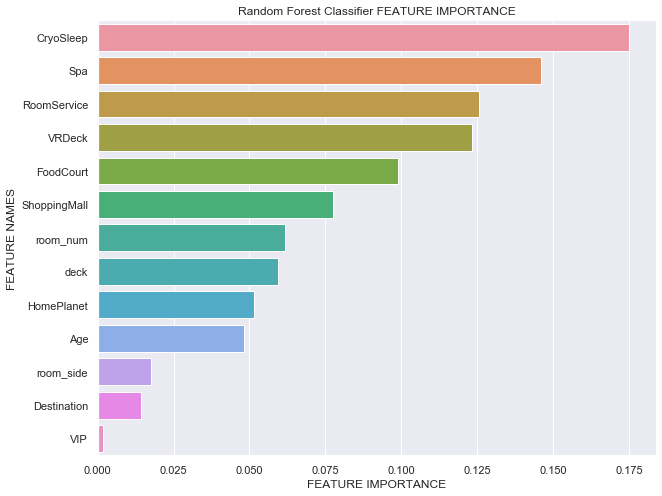

In [155]:
plot_feature_importance(f_model.feature_importances_,feature,model_name)

##### With this information, the whole process can be repeated for the random forest model, but this time excluding the columns "room_side", "Destination", and "VIP" since they provide little to no information to the model. 